# Assignment05-Q.02

## Consider only the below columns and prepare a prediction model for predicting Price.

## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
toyota=pd.read_csv('/content/drive/MyDrive/Datasets/Multi Linear Regression/ToyotaCorolla.csv',encoding='latin1')

In [ ]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [ ]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

### No Null Values

In [ ]:
toyota2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyo=toyota2.rename({'Age_08_04':'AGE','cc':'CC','Quarterly_Tax':'QTAX','Weight':'WT'},axis=1)
toyo

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyo[toyo.duplicated()]

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
113,24950,8,13253,116,2000,5,5,234,1320


#### Droping Duplicate values from dataset.

In [ ]:
toyo1=toyo.drop_duplicates().reset_index(drop=True)
toyo1

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyo1.describe()

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Let's find out Correlation.

In [ ]:
toyo1.corr()

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTAX,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


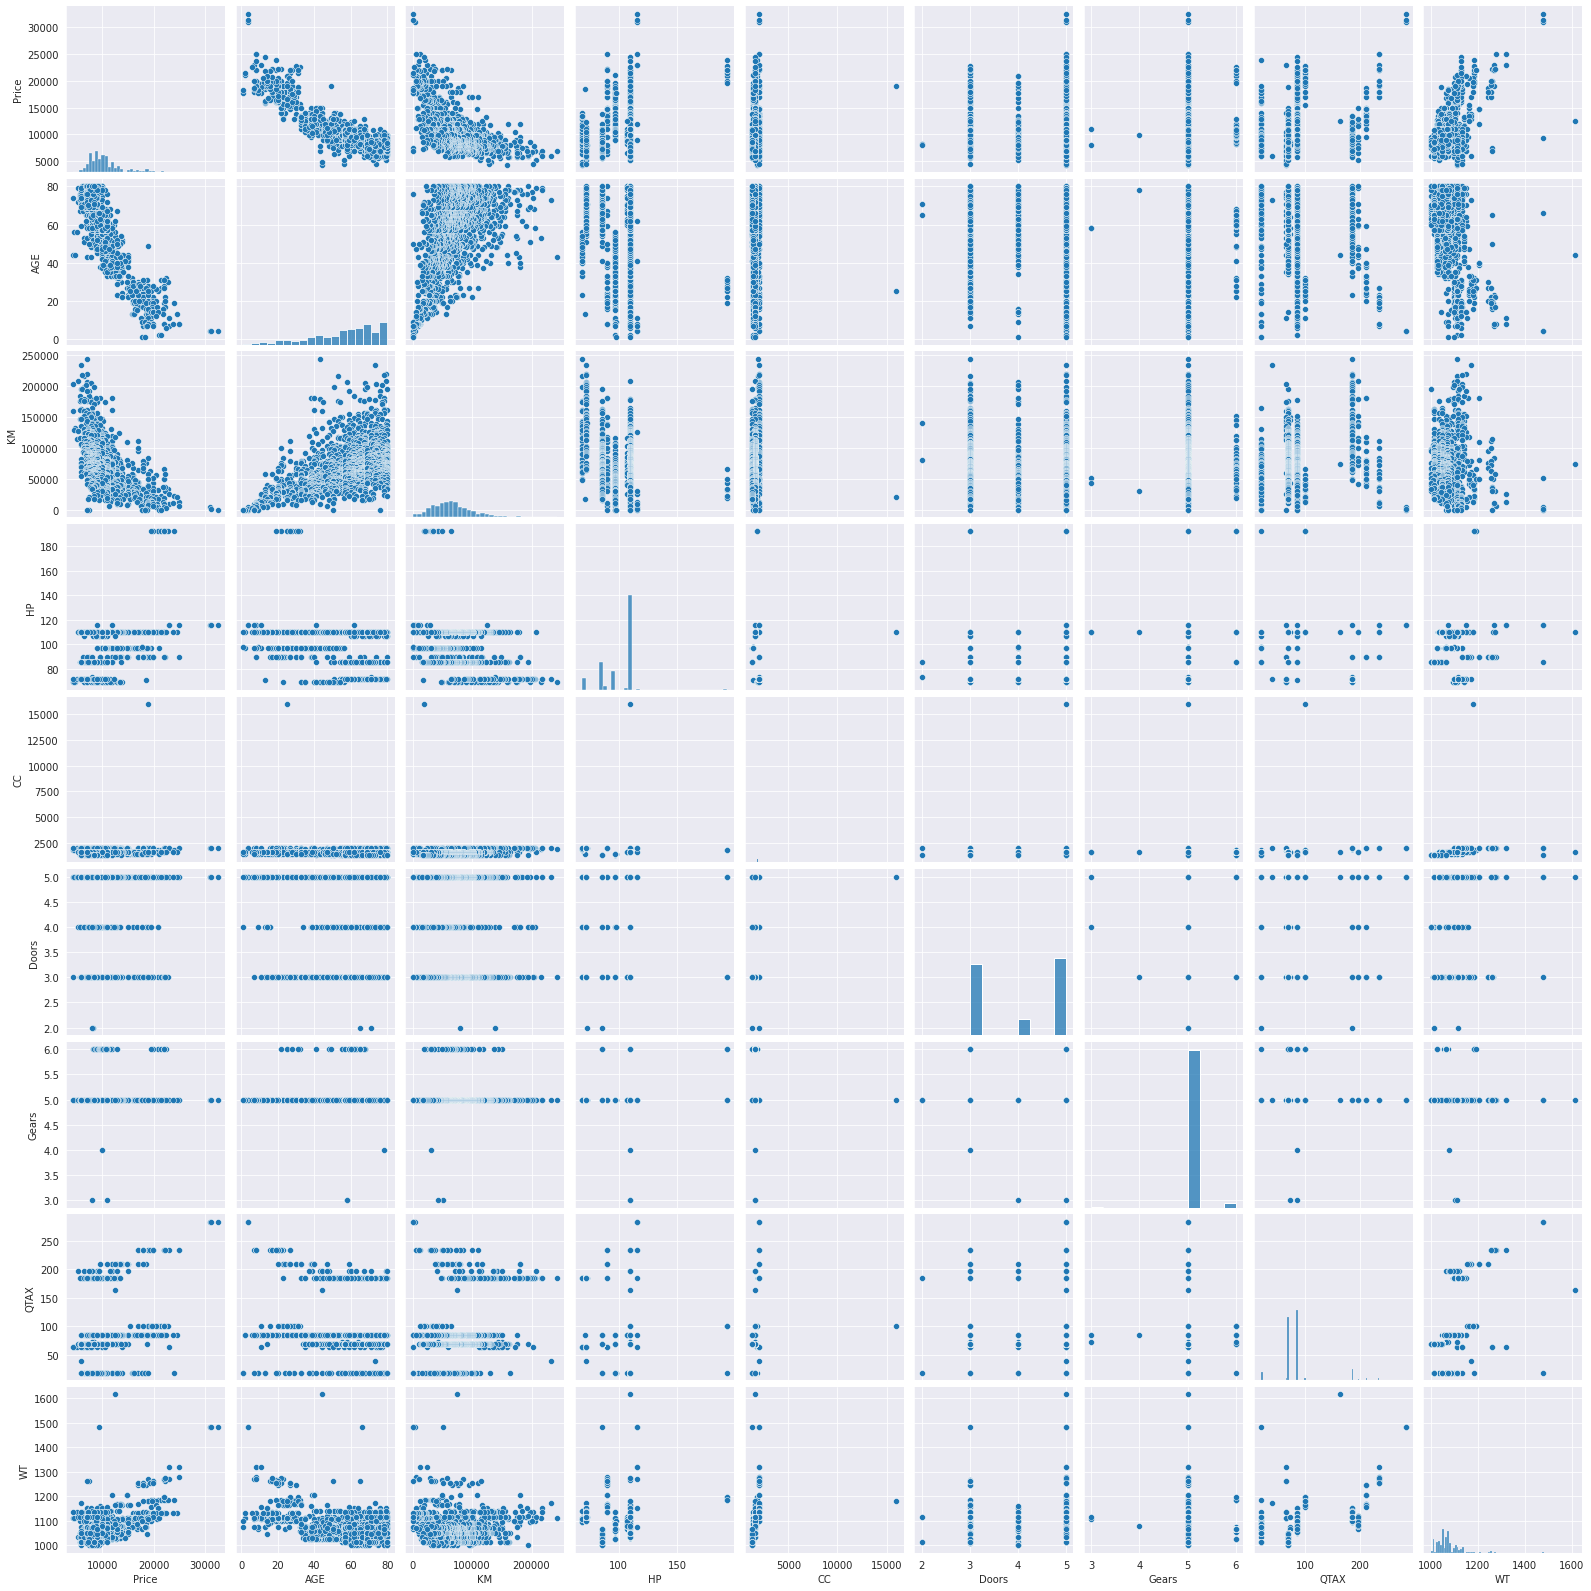

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo1)

# Model Building & Testing.

In [ ]:
model1=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QTAX+WT',data=toyo1).fit()
model1.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QTAX            3.858805
WT             16.855470
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:31:03   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AGE         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTAX           3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### There is collinearity problem in 'CC' & 'Doors' because P_value is greater than alpha (0.05). But R^2 value is good(0.863).

#### Prepare for simple linear regression model between 'CC' & 'Doors'. For insignificant variables.

In [ ]:
model1_values=(model1.rsquared,model1.rsquared_adj,model1.aic)
model1_values

(0.8625200256947, 0.8617487495415146, 24750.407207346932)

In [ ]:
CC_md=smf.ols("Price~CC",data=toyo1).fit()
CC_md.tvalues , CC_md.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

### CC_md have sgnificant p_value

In [ ]:
Doors_md=smf.ols("Price~Doors",data=toyo1).fit()
Doors_md.tvalues , Doors_md.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

### Doors_md have sgnificant p_value

In [ ]:
CC_Do_md=smf.ols("Price~CC+Doors",data=toyo1).fit()

In [ ]:
CC_Do_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sun, 16 Jan 2022   Prob (F-statistic):           2.55e-15
Time:                        06:40:27   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### CC & Doors Vriables have significant p_value But R^2 value decreased.

## MODEL VALIDATION

### Dection of colinearity - VIF --> Variance Inflation Factor

In [ ]:
rsq_age=smf.ols('AGE~KM+HP+CC+Doors+Gears+QTAX+WT',data=toyo1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~AGE+HP+CC+Doors+Gears+QTAX+WT',data=toyo1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~AGE+KM+CC+Doors+Gears+QTAX+WT',data=toyo1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~AGE+KM+HP+Doors+Gears+QTAX+WT',data=toyo1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~AGE+KM+HP+CC+Gears+QTAX+WT',data=toyo1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~AGE+KM+HP+CC+Doors+QTAX+WT',data=toyo1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QTAX~AGE+KM+HP+CC+Doors+Gears+WT',data=toyo1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('WT~AGE+KM+HP+CC+Doors+Gears+QTAX',data=toyo1).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [ ]:
# Create a Dataframe format
d1={'Variables':['AGE','KM','HP','CC','Doors','Gears','QTAX','WT'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTAX,2.295375
7,WT,2.487180


#### All VIF values are less than 10 or 20. so No collinearity. 

## Residual analysis

#### Test for Normality of Residuals (Q-Q Plot) using residual model.

In [ ]:
import statsmodels.api as sm
res=model1.resid
res

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

In [ ]:
res.mean()

-8.526243466578865e-10

#### If residual mean = 0. means 0 errors or outliers.

<function matplotlib.pyplot.show>

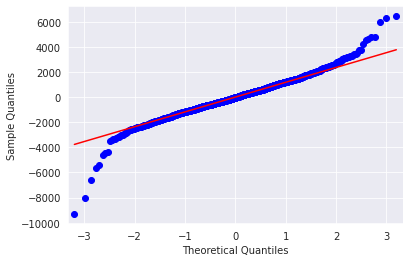

In [ ]:
qqplot=sm.qqplot(res,line='q')
plt.title
plt.show

In [ ]:
list(np.where(model1.resid<-5000))

[array([190, 191, 220, 600, 959])]

## Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values(vals): return(vals-vals.mean()/vals.std())

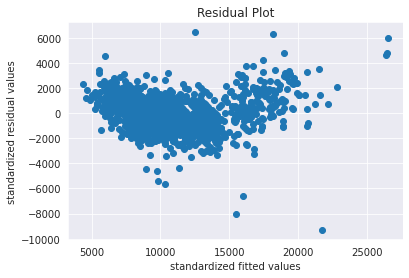

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

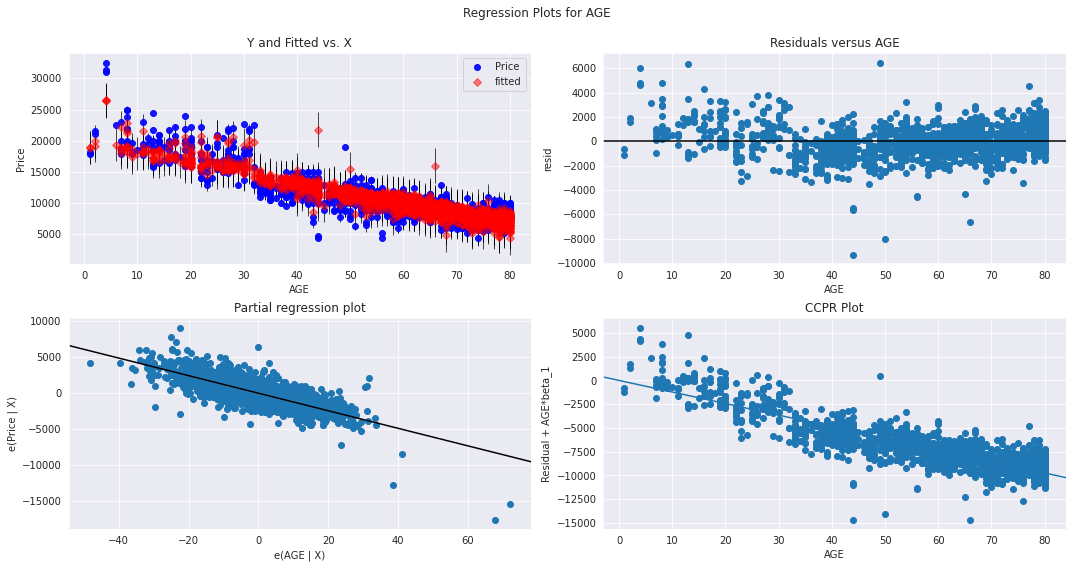

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

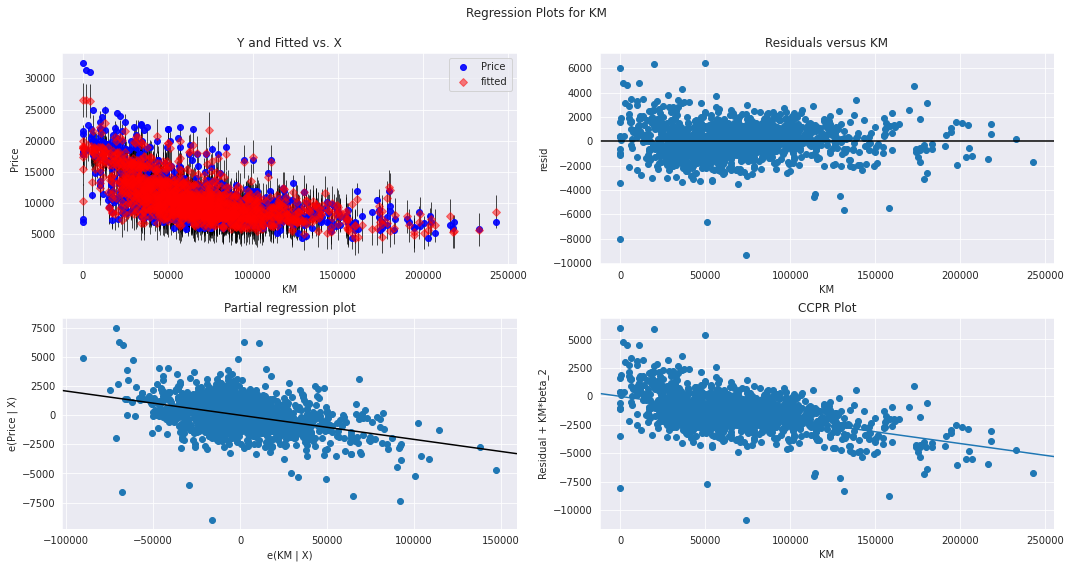

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

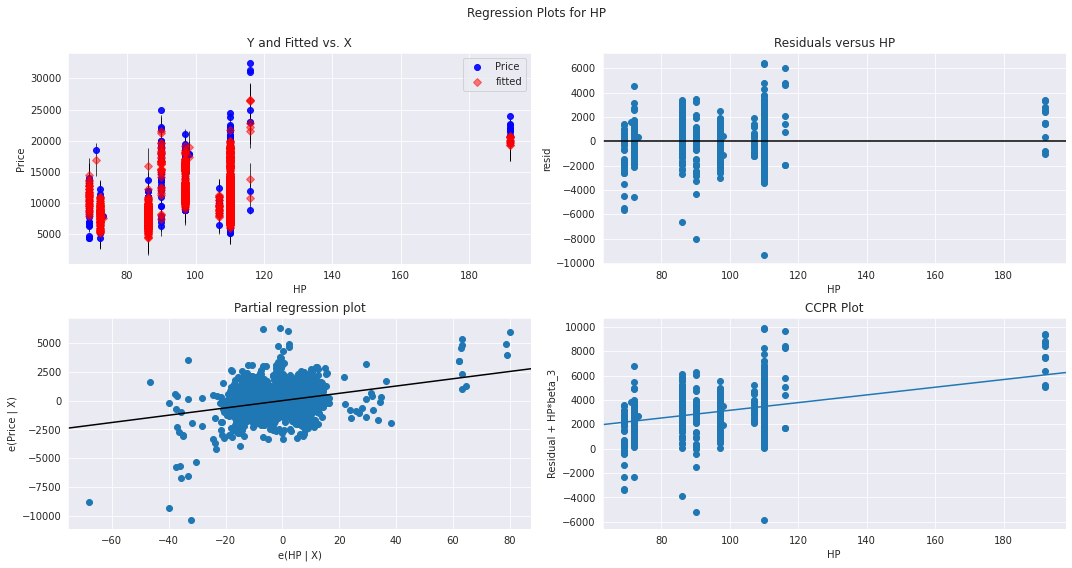

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

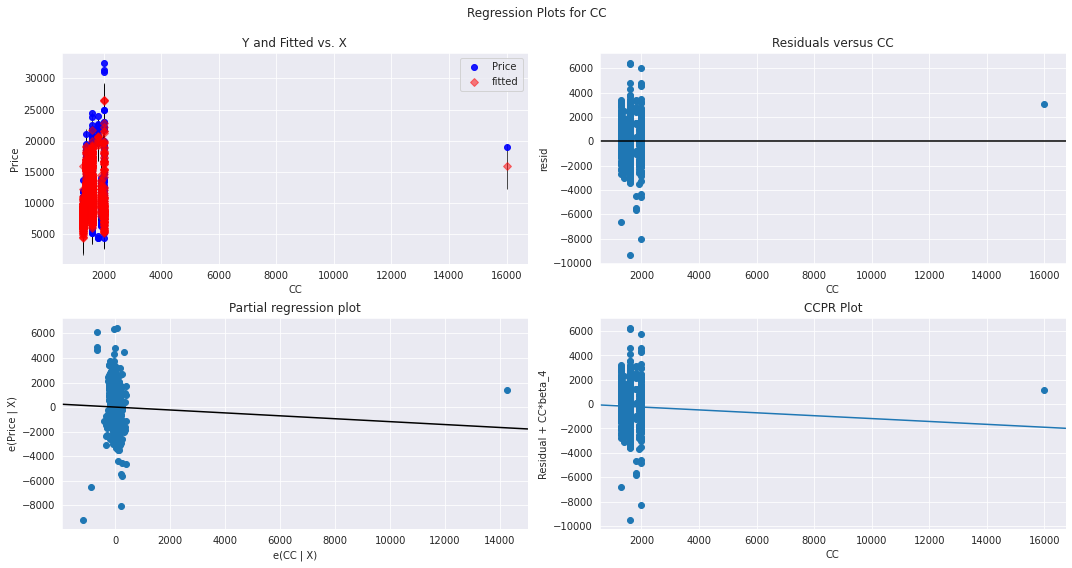

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

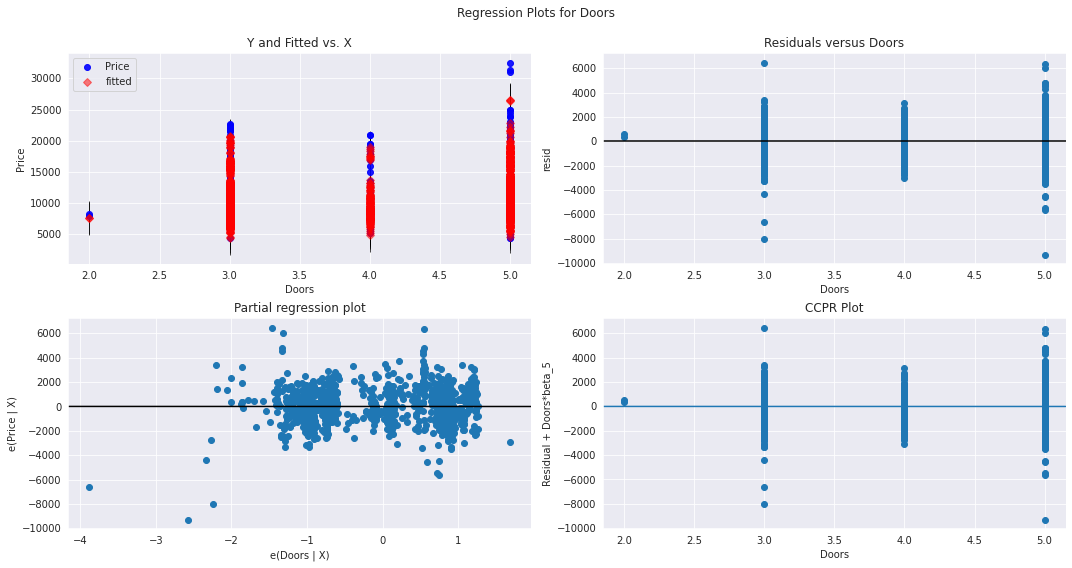

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

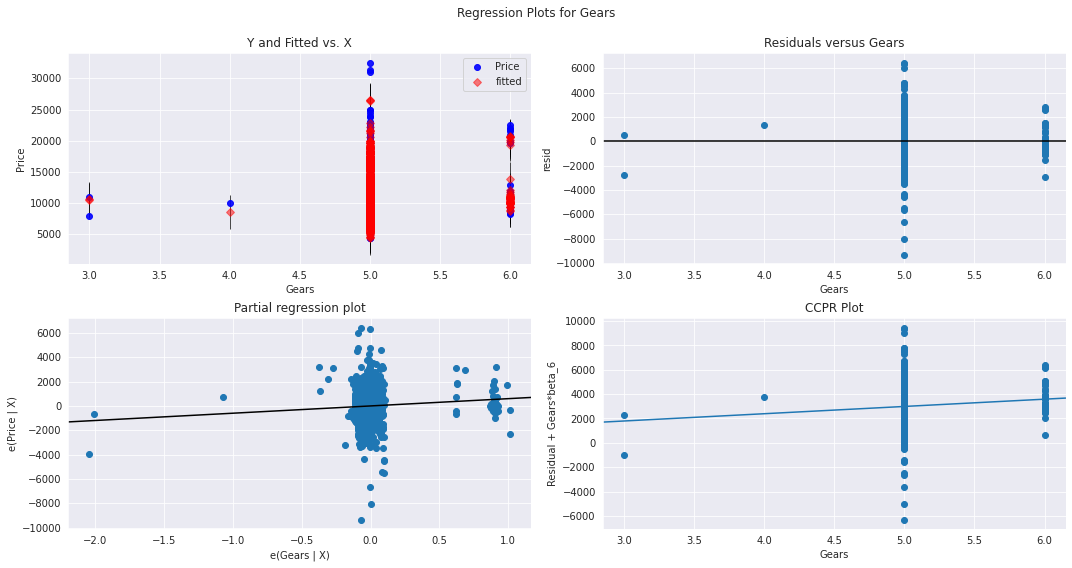

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

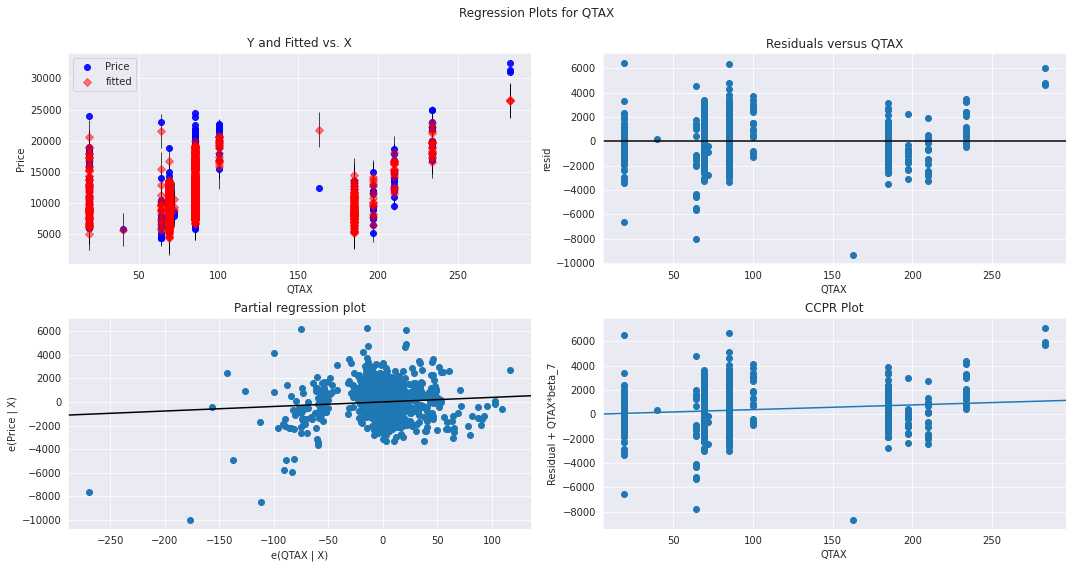

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QTAX',fig=fig)
plt.show()

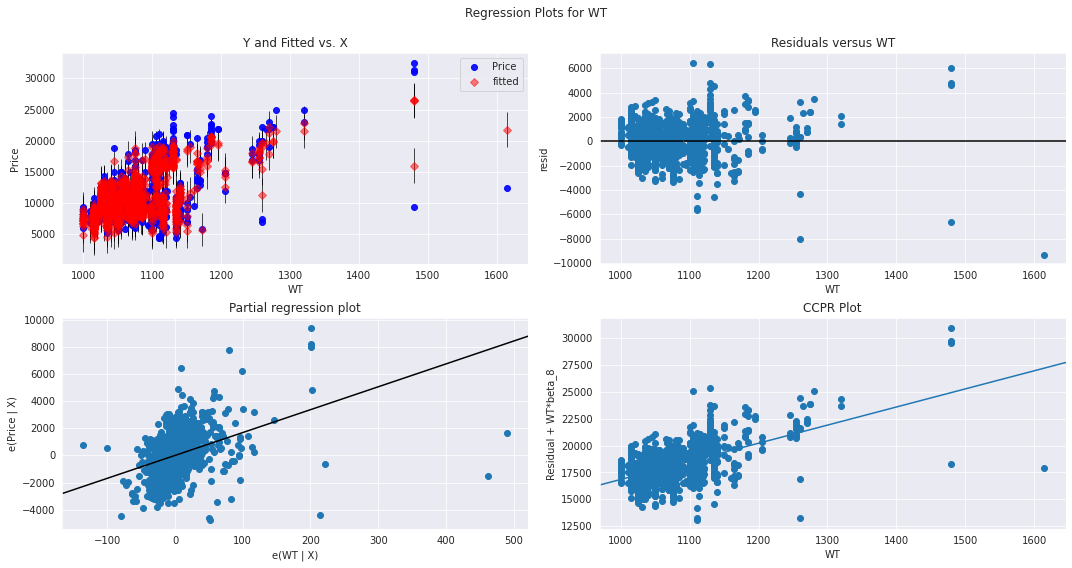

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

## Model Deletion Diagnostics

#### Detection of Outlier Cook's distance plot

In [ ]:
(c,_)=model1.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

# Plot the influencers using the stem plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


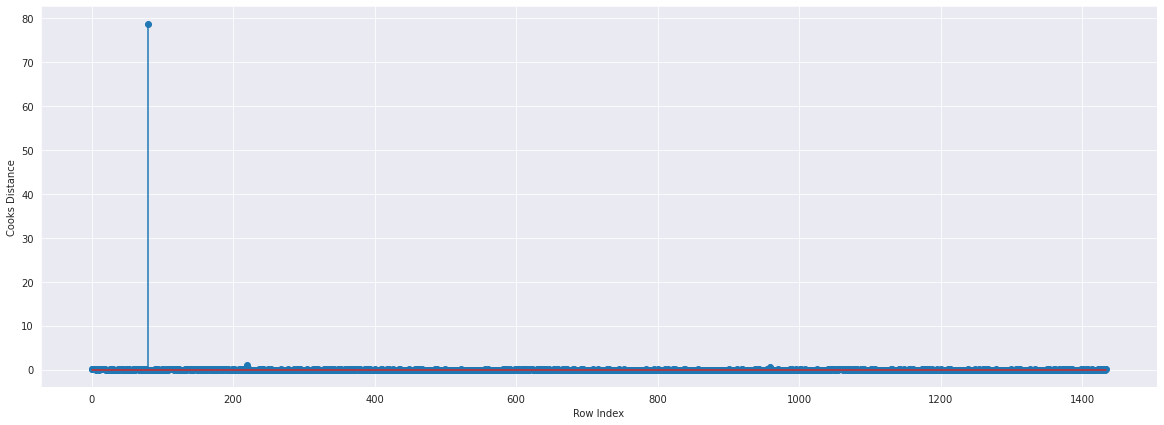

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
## Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582259465)

## High Influence points

### Leverage Plot

#### Alternate method for cook's distance plot

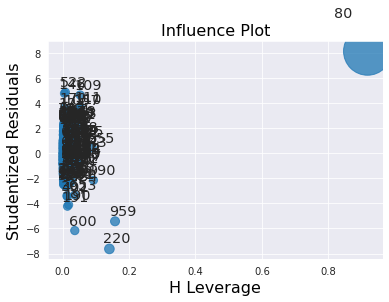

In [ ]:
influence_plot(model1)
plt.show()

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo1.shape[1]
n=toyo1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [ ]:
toyo1[toyo1.index.isin([80])] # 80 is the influencers

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the model
### drop the influencers


In [ ]:
NW_df=toyo1.drop(toyo1.index[[80]],axis=0).reset_index()
NW_df.tail()

,index,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015
1433,1434,6950,76,1,110,1600,5,5,19,1114


In [ ]:
toyota_N=NW_df.drop(['index'],axis=1)
toyota_N.tail()

,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015
1433,6950,76,1,110,1600,5,5,19,1114


In [ ]:
model2=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QTAX+WT',data=toyota_N).fit()
model2_values=(model2.rsquared,model2.rsquared_adj,model2.aic)
model2_values

(0.8681163912634053, 0.867375992056463, 24669.363894157)

# Imporoving Model Again

In [ ]:
model2_influence=model2.get_influence()
(c, _)=model2_influence.cooks_distance

# Plot the influencers values using stem plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


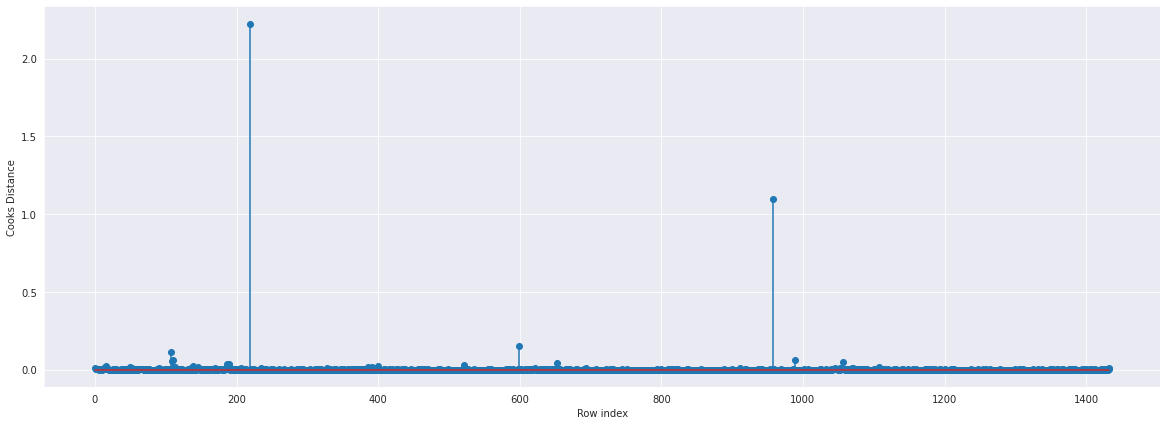

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyota_N)),np.round(c ,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

## Index and value of influencer where c is more than .5

In [ ]:
(np.argmax(c),np.max(c))


(219, 2.225351365527531)

## High Influence points

### Leverage Plot
### Alternate method for cook's distance plot

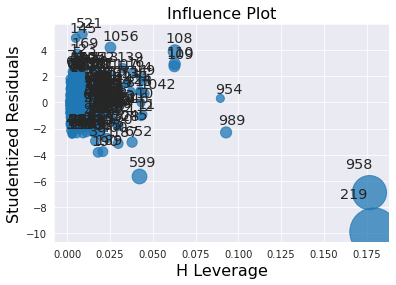

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model2)
plt.show()

In [ ]:
toyota_N2=toyota_N.drop(toyota_N.index[[219,958]],axis=0).reset_index()
toyota_N2

,index,Price,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1429,7500,69,20544,86,1300,3,5,69,1025
1428,1430,10845,72,19000,86,1300,3,5,69,1015
1429,1431,8500,71,17016,86,1300,3,5,69,1015
1430,1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota_N2=toyota_N2.drop(['index'],axis=1)

In [ ]:
model3=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QTAX+WT',data=toyota_N2).fit()

In [ ]:
model3_influence = model3.get_influence()
(toyota_N2, _) = model3_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


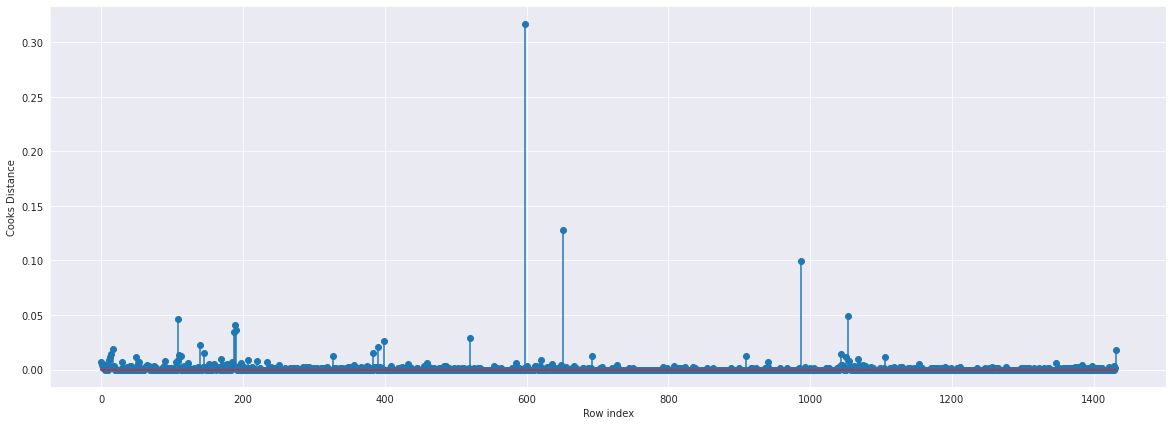

In [ ]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyota_N2)), np.round(toyota_N2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(toyota_N2),np.max(toyota_N2))

(598, 0.31689035401452836)

In [ ]:
model3_values=model3.rsquared,model3.rsquared_adj,model3.aic
model3_values

(0.8839684606741538, 0.8833161400033128, 24453.23573612724)

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:07:13   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
AGE         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP            36.5587      2.747     13.308      0.000      31.170      41.947
CC            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears        466.6014    181.031      2.577      0.010     111.485     821.718
QTAX           5.1754      1.373      3.770      0.000       2.482       7.869
WT            30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_values_df=pd.DataFrame({'model1':model1_values,'model2':model2_values,'model3':model3_values},index=['rsquared','rsquared_adj','AIC'])
model_values_df

,model1,model2,model3
rsquared,0.862520,0.868116,0.883968
rsquared_adj,0.861749,0.867376,0.883316
AIC,24750.407207,24669.363894,24453.235736


## Model Prediction

### Predict For New Data

In [ ]:
new_data=pd.DataFrame({'AGE':21,"KM":80000,"HP":66,"CC":1500,"Doors":4,"Gears":6,"QTAX":60,"WT":1200},index=[0])
new_data

,AGE,KM,HP,CC,Doors,Gears,QTAX,WT
0,21,80000,66,1500,4,6,60,1200


In [ ]:
model3.predict(new_data)

0    17643.809589
dtype: float64

In [ ]:
# prediction for all data set
model3.predict(toyota_N2)

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1427     9114.821644
1428     8499.169594
1429     8644.902871
1430     8758.662855
1431    10638.570082
Length: 1432, dtype: float64

# R^2 value table of each model

In [ ]:
d2={'Prep_Models':['model1','model2','model3'],'Rsquared':[model1.rsquared, model2.rsquared,model3.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,model1,0.862520
1,model2,0.868116
2,model3,0.883968


## Model3 is the best model because p_value is lesser than alpha(0.05)
## &
## R^2 value is 0.883 which is greater than 0.85.